# Draft analysis 

---

Group name: Gruppe C: DA-Statistics-Nadine-Alena

---


## Introduction

#### Einführung und Motivation

In einer Welt, die zunehmend alle Bereiche des Lebens von digitaler Interaktionen geprägt sind, hat sich der Weg der zwischenmenschlichen Beziehungen grundlegend gewandelt. Um einzukaufen, Vertragsanliegen zu klären oder neue Leute kennenzulernen, reicht heutzutage ein Klick auf das Display des Smartphones. Es ist nicht mehr notwendig das Haus zu verlassen. Insbesondere die Nutzung von Dating-Plattformen wie Lovoo, Tinder oder Bumble ermöglicht es, potenzielle Partner auf eine Weise zu finden, die weit über die alten, herkömmlichen Methoden hinausgeht. Bereits jetzt lernen sich laut repräsentativer Umfrage 24% der Paare im Internet bzw. via Dating-App kennen. Damit ist diese Methode, zusammen mit dem Kennenlernen über Freunde, die häufigste Art und Weise im Jahr 2023 seinen Partner zu finden.(Quelle: https://de.statista.com/statistik/daten/studie/1025036/umfrage/umfrage-in-deutschland-zum-ort-des-kennenlernens-des-partners/) Doch durch die vermehrte Nutzung von Dating Plattformen steht jedes Profil vor der Herausforderung, aus der Masse hervorzustechen, positive Reaktionen zu generieren und anderen Nutzern aufzufallen.

In dieser Ära des digitalen Wandels stehen Lovoo-Nutzer vor der Herausforderung, ihre Persönlichkeit und Anziehungskraft in einem begrenzten virtuellen Raum auszudrücken. Die einzige Möglichkeit, die Aufmerksamkeit anderer Nutzer auf sich zu ziehen, besteht in der Ausgestaltung des Nutzerprofils, das nur begrenzten Informationsumfang zulässt. Aber was macht ein erfolgreiches Lovoo-Profil aus? Welche Profilmerkmale generieren genügend Mehrwert, um andere Nutzer zur Interaktion mit dem eigenen Profil zu bewegen? Die Antworten auf diese Fragen können nicht nur für Einzelpersonen von Interesse sein, die aktiv nach romantischen Beziehungen suchen, sondern werfen auch tiefergehende Fragen über menschliches Verhalten, Vorlieben und Kommunikationsmuster auf.

#### Datengrundlage und Analyseziel

Durch die Analyse weiblicher Nutzerprofile aus dem Jahr 2015 soll anhand linearer Modelle ermittelt werden, welche Voraussetzungen ein Profil erfüllen muss, um seine Chancen auf virtuelle Interaktion zu erhöhen. Diese Erkenntnisse ermöglichen nicht nur eine personalisierte Optimierung von Profilen für individuellen Erfolg, sondern eröffnen auch Einblicke in soziokulturelle Dynamiken und digitale Kommunikationsstrategien.

Als Datengrundlage dienen die Informationen auf den Accounts verschiedener weiblicher Nutzer, die während der Interaktion mit männlichen Dummy-Profilen ausgelesen wurden. Zu den für diese Analyse relevanten Daten zählen vor allem die Informationsdichte des Profils, die Anzahl der hochgeladenen Bilder, der Profilbesuche und generierten Kisses, sowie das Alter der Person.

#### Forschungsfrage

Anhand der vorliegenden Angaben je Profil soll mithilfe einer linearen Regression im folgenden erforscht werden, welche Profileigenschaften vorliegen sollten, um möglichst viele Profilbesuche zu generieren, was die Wahrscheinlichkeit einer Interaktion mit anderen Nutzern erhöht. Ziel ist es, die Anzahl der Profilbesuche anhand der vorliegenden Nutzerdaten vorherzusagen und damit den wahrscheinlichen Erfolg eines Profils zu bestimmen. 

Zudem wird mithilfe der logistischen Regression untersucht, wie ein Account beschaffen sein muss, um Fans zu generieren, also andere User dazu zu bewegen, dem Profil zu folgen. Ziel ist es, anhand der Nutzerdaten vorherzusagen, ob ein Profil das Potenzial hat, mindestens einen Fan zu generieren oder nicht. 

#### Data Dictionary

In einer verkürzten Version des Data Dictionary aus dem Project Proposal sind nur noch die Variablen dargestellt, die für die Durchführung der Analysen benötigt werden.


In [13]:
import pandas as pd
data = {
    'Name': ['counts_profileVisits', 'counts_details', 'age', 'counts_pictures', 'counts_kisses', 'counts_fans', 'fans'],
    'Description': ['Anzahl der Besuche anderer Nutzer auf dem betrachteten Profil', 'Anteil der auf dem Profil gefüllen Accountdetails', 'Alter des Profilinhabers', 'Anzahl der auf dem Profil hochgeladenen Bilder', 'Anzahl der für das Profil vergebenen Kisses (ähnlich den Likes auf Instagram)', 'Anzahl der Fans des Profils, ähnlich Follower auf anderen Plattformen', 'Binerische Angabe, ob ein Profil über Fans verfügt oder nicht '],
    'Role': ['Response', 'Predictor', 'Predictor', 'Predictor', 'Predictor', 'Predictor', 'Response'],
    'Type': ['numerisch', 'numerisch', 'numerisch', 'numerisch', 'numerisch', 'numerisch', 'nominal'],
    'Format': ['float', 'float', 'float', 'float', 'float','float', 'category']
}


data_dictionary = pd.DataFrame(data)
data_dictionary

,Name,Description,Role,Type,Format
0,counts_profileVisits,Anzahl der Besuche anderer Nutzer auf dem betr...,Response,numerisch,float
1,counts_details,Anteil der auf dem Profil gefüllen Accountdetails,Predictor,numerisch,float
2,age,Alter des Profilinhabers,Predictor,numerisch,float
3,counts_pictures,Anzahl der auf dem Profil hochgeladenen Bilder,Predictor,numerisch,float
4,counts_kisses,Anzahl der für das Profil vergebenen Kisses (ä...,Predictor,numerisch,float
5,counts_fans,"Anzahl der Fans des Profils, ähnlich Follower ...",Predictor,numerisch,float
6,fans,"Binerische Angabe, ob ein Profil über Fans ver...",Response,nominal,category


## Setup

In [14]:
import numpy as np
import pandas as pd
import altair as alt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from joblib import dump, load




## Data

## Import data

In [15]:
URL = 'https://raw.githubusercontent.com/DA-Statistics-Nadine-Alena/project/main/references/LOVOO_Daten.csv'
df = pd.read_csv(URL)

### Data structure

In [16]:
df.head()

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,pictureId,userId,isSystemProfile
0,F,M,25.0,daeni,1.00,4.0,8279.0,239.0,0.0,3.0,...,1.0,2015-04-25T20:43:26Z,1.429995e+09,0.0,NaN,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,NaN
1,F,M,22.0,italiana 92,0.85,5.0,663.0,13.0,0.0,0.0,...,1.0,2015-04-26T09:19:35Z,1.430040e+09,0.0,NaN,NaN,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,NaN
2,F,M,21.0,Lauraaa,0.00,4.0,1369.0,88.0,0.0,2.0,...,1.0,2015-04-06T14:24:07Z,1.428330e+09,0.0,NaN,NaN,NaN,4ec96c090dc82cb25d00000a,54a584ecc56da128638b4674,NaN
3,F,none,20.0,Qqkwmdowlo,0.12,3.0,22187.0,1015.0,2.0,3.0,...,1.0,2015-04-07T11:21:01Z,1.428406e+09,0.0,NaN,NaN,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,NaN
4,F,M,21.0,schaessie {3,0.15,12.0,35262.0,1413.0,9.0,12.0,...,1.0,2015-04-06T14:25:20Z,1.428330e+09,0.0,NaN,NaN,Instagram: JESSSIESCH,4ef3cc5aa9d0b3d07d000017,54e1a6f6c76da135748b4a3a,NaN


In [17]:
df.tail()

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,pictureId,userId,isSystemProfile
3850,F,M,21.0,B**f,0.85,1.0,280.0,15.0,0.0,0.0,...,1.0,2015-04-07T00:08:59Z,1.428365e+09,0.0,1.0,NaN,NaN,CRYqKLbQ1+pd5CVSmGGccV+EggT4oGRmaXWhnn5jhMg9Jz...,cb958a9459216acd4dd06f213fe63685,NaN
3851,F,M,20.0,Ma**e,1.00,8.0,1014.0,43.0,3.0,0.0,...,1.0,2015-04-06T07:54:34Z,1.428307e+09,0.0,1.0,NaN,Marie ॐ 🎉Goa. ...,CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te...,d5a7edbcb59fcb092871bdcde7f142ca,NaN
3852,F,M,20.0,Ma**e,1.00,8.0,1101.0,46.0,3.0,0.0,...,1.0,2015-04-06T07:54:34Z,1.428307e+09,0.0,1.0,NaN,Marie ॐ 🎉Goa. ...,CRYVOrW7zgSV+NPGili4nZeREmQ0rAAXCZunTXp9KRLat1...,d5a7edbcb59fcb092871bdcde7f142ca,NaN
3853,F,M,23.0,Eni**n,0.96,8.0,8702.0,142.0,0.0,0.0,...,0.0,2015-04-06T15:47:15Z,1.428335e+09,0.0,1.0,NaN,ruhig shriebe😉. bissä ni,CRYsH4q+r4fCkC8+leJqDdJQtbUNQGCyqLx36aDsEzC5b9...,e532a6060fe4e5902c66086d905a9d53,NaN
3854,F,M,23.0,Eni**n,0.96,9.0,8904.0,143.0,0.0,0.0,...,0.0,2015-04-19T08:38:08Z,1.429433e+09,0.0,1.0,NaN,ruhig shriebe😉. bissä ni,CRYbrX0C8ToNrsDqLPf+kLsCSuDY0TOhyKSo3Phw98sbl+...,dc186f3855343c9f096c484f6d363aac,NaN


In [18]:
df.describe()

,age,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,distance,isFlirtstar,isHighlighted,...,isNew,isOnline,isVip,lang_count,verified,shareProfileEnabled,lastOnlineTime,birthd,crypt,isSystemProfile
count,3428.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3406.000000,3426.000000,3426.000000,...,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3.425000e+03,3426.000000,20.0,2.0
mean,21.995916,0.553987,4.610917,3515.929947,147.919731,2.256859,0.117922,203.072196,0.011384,0.011384,...,0.252481,0.595155,0.019848,1.103036,0.204320,0.964098,1.428903e+09,0.004378,1.0,1.0
std,1.966598,0.328922,4.363296,6171.558587,342.786456,11.659049,1.131675,144.682194,0.106100,0.106100,...,0.434499,0.490934,0.139499,0.569961,0.403263,0.186073,8.214765e+05,0.066033,0.0,0.0
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.426592e+09,0.000000,1.0,1.0
25%,20.000000,0.310000,2.000000,362.250000,10.000000,0.000000,0.000000,81.300000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.428332e+09,0.000000,1.0,1.0
50%,22.000000,0.620000,3.000000,1151.500000,42.000000,0.000000,0.000000,172.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.428387e+09,0.000000,1.0,1.0
75%,24.000000,0.850000,6.000000,3895.750000,134.000000,0.000000,0.000000,317.750000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.429985e+09,0.000000,1.0,1.0
max,28.000000,1.000000,30.000000,58944.000000,6155.000000,241.000000,43.000000,1632.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.430647e+09,1.000000,1.0,1.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  3855 non-null   object 
 1   genderLooking           3428 non-null   object 
 2   age                     3428 non-null   float64
 3   name                    3428 non-null   object 
 4   counts_details          3426 non-null   float64
 5   counts_pictures         3426 non-null   float64
 6   counts_profileVisits    3426 non-null   float64
 7   counts_kisses           3426 non-null   float64
 8   counts_fans             3426 non-null   float64
 9   counts_g                3426 non-null   float64
 10  flirtInterests_chat     3426 non-null   object 
 11  flirtInterests_friends  3426 non-null   object 
 12  flirtInterests_date     3426 non-null   object 
 13  country                 3426 non-null   object 
 14  city                    3157 non-null   

### Data corrections

Zunächst wird dem DataFrame eine neue Spalte hinzugefügt, die Angibt, ob das in der Zeile repräsentierte Profil über Fans verfügt oder nicht. Grundlage dabei ist die Spalte "counts_fans", ist die dort eingetragene Zahl größer als Eins, so wird das Profil in der neuen Spalte "fans" mit einer 1 gekennzeichnet. Verfügt das Profil laut "counts_fans" über keine Fans, erhält es in der Spalt "fans" eine 0.

In [20]:
df['fans'] = pd.Series(['1' if x > 0 else '0' if x == 0 else '' for x in df['counts_fans']], index=df.index)

df.head()

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,pictureId,userId,isSystemProfile,fans
0,F,M,25.0,daeni,1.00,4.0,8279.0,239.0,0.0,3.0,...,2015-04-25T20:43:26Z,1.429995e+09,0.0,NaN,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,NaN,0
1,F,M,22.0,italiana 92,0.85,5.0,663.0,13.0,0.0,0.0,...,2015-04-26T09:19:35Z,1.430040e+09,0.0,NaN,NaN,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,NaN,0
2,F,M,21.0,Lauraaa,0.00,4.0,1369.0,88.0,0.0,2.0,...,2015-04-06T14:24:07Z,1.428330e+09,0.0,NaN,NaN,NaN,4ec96c090dc82cb25d00000a,54a584ecc56da128638b4674,NaN,0
3,F,none,20.0,Qqkwmdowlo,0.12,3.0,22187.0,1015.0,2.0,3.0,...,2015-04-07T11:21:01Z,1.428406e+09,0.0,NaN,NaN,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,NaN,1
4,F,M,21.0,schaessie {3,0.15,12.0,35262.0,1413.0,9.0,12.0,...,2015-04-06T14:25:20Z,1.428330e+09,0.0,NaN,NaN,Instagram: JESSSIESCH,4ef3cc5aa9d0b3d07d000017,54e1a6f6c76da135748b4a3a,NaN,1


Bei genauer Betrachtung der Ausprägungen in der Spalte Gender, so fällt auf, dass die zugrunde liegende csv-Tablle in einigen Zeilen fehlerhaft war, weshalb dort in der entsprechenden Spalte keine der erwarteten Ausprägungen F (= Frau), M (= Mann) und none (= keine Angabe) vermerkt ist. Die fehlerhaft Datenstruktur erstreckt sich über die ganze Zeile der betreffenden Profile, weshalb sie identifiziert und entfernt werden müssen. Hierzu werden die obengenannten Ausprägungen als accepted Values festgelegt, um die übrigen Zeilen mit anderen Werten herauszufiltern.

In [21]:
gender_counts = df['gender'].value_counts()

female_count = gender_counts.get('F', 0)
male_count = gender_counts.get('M', 0)
none_count = gender_counts.get('none', 0)

other_count = gender_counts.sum() - female_count - male_count - none_count

print("Anzahl der 'F'-Werte:", female_count)
print("Anzahl der 'M'-Werte:", male_count)
print("Anzahl der 'none'-Werte:", none_count)
print("Anzahl der anderen Werte:", other_count)


Anzahl der 'F'-Werte: 3428
Anzahl der 'M'-Werte: 0
Anzahl der 'none'-Werte: 0
Anzahl der anderen Werte: 427


In [22]:
accepted_values = ['F', 'M', 'none']

filtered_df = df[df['gender'].isin(accepted_values)]

print("Aktualisiertes DataFrame ohne 'andere Werte':")
filtered_df


Aktualisiertes DataFrame ohne 'andere Werte':


,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,pictureId,userId,isSystemProfile,fans
0,F,M,25.0,daeni,1.00,4.0,8279.0,239.0,0.0,3.0,...,2015-04-25T20:43:26Z,1.429995e+09,0.0,NaN,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,NaN,0
1,F,M,22.0,italiana 92,0.85,5.0,663.0,13.0,0.0,0.0,...,2015-04-26T09:19:35Z,1.430040e+09,0.0,NaN,NaN,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,NaN,0
2,F,M,21.0,Lauraaa,0.00,4.0,1369.0,88.0,0.0,2.0,...,2015-04-06T14:24:07Z,1.428330e+09,0.0,NaN,NaN,NaN,4ec96c090dc82cb25d00000a,54a584ecc56da128638b4674,NaN,0
3,F,none,20.0,Qqkwmdowlo,0.12,3.0,22187.0,1015.0,2.0,3.0,...,2015-04-07T11:21:01Z,1.428406e+09,0.0,NaN,NaN,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,NaN,1
4,F,M,21.0,schaessie {3,0.15,12.0,35262.0,1413.0,9.0,12.0,...,2015-04-06T14:25:20Z,1.428330e+09,0.0,NaN,NaN,Instagram: JESSSIESCH,4ef3cc5aa9d0b3d07d000017,54e1a6f6c76da135748b4a3a,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,F,M,21.0,B**f,0.85,1.0,280.0,15.0,0.0,0.0,...,2015-04-07T00:08:59Z,1.428365e+09,0.0,1.0,NaN,NaN,CRYqKLbQ1+pd5CVSmGGccV+EggT4oGRmaXWhnn5jhMg9Jz...,cb958a9459216acd4dd06f213fe63685,NaN,0
3851,F,M,20.0,Ma**e,1.00,8.0,1014.0,43.0,3.0,0.0,...,2015-04-06T07:54:34Z,1.428307e+09,0.0,1.0,NaN,Marie ॐ 🎉Goa. ...,CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te...,d5a7edbcb59fcb092871bdcde7f142ca,NaN,1
3852,F,M,20.0,Ma**e,1.00,8.0,1101.0,46.0,3.0,0.0,...,2015-04-06T07:54:34Z,1.428307e+09,0.0,1.0,NaN,Marie ॐ 🎉Goa. ...,CRYVOrW7zgSV+NPGili4nZeREmQ0rAAXCZunTXp9KRLat1...,d5a7edbcb59fcb092871bdcde7f142ca,NaN,1
3853,F,M,23.0,Eni**n,0.96,8.0,8702.0,142.0,0.0,0.0,...,2015-04-06T15:47:15Z,1.428335e+09,0.0,1.0,NaN,ruhig shriebe😉. bissä ni,CRYsH4q+r4fCkC8+leJqDdJQtbUNQGCyqLx36aDsEzC5b9...,e532a6060fe4e5902c66086d905a9d53,NaN,0


Da in den linearen Regressionsmodellen keine Leerzellen bzw. NaN Werte akzeptiert werden, werden die relevanten numerischen Spalten bereinigt, indem die Zeilen mit NaN Werten in den entsprechenden Spalten herausgefiltert werden.

In [23]:
filtered_df=filtered_df.dropna(subset=['counts_profileVisits','counts_pictures','counts_kisses','counts_fans'])

filtered_df = filtered_df.reset_index(drop=True)

In [24]:
df = filtered_df.copy()

Im Anschluss daran wird stichprobenartig überprüft, dass in keinen Spalten unerwartete Werte enthalten sind, die in der späteren Modellierung stören könnten. Daraufhin wird die Struktur der bereinigten Tabelle erneut angezeigt, dabei werden einige in jedem Fall irrelevante Spalten bereits aus der Anzeige entfernt.

In [25]:
df['genderLooking'].value_counts()

genderLooking
M       3083
none     306
F         22
both      15
Name: count, dtype: int64

In [26]:
df['age'].value_counts()

age
22.0    619
21.0    518
23.0    512
19.0    457
24.0    456
20.0    448
25.0    313
26.0    100
28.0      1
18.0      1
27.0      1
Name: count, dtype: int64

In [27]:
df['gender'].value_counts()

gender
F    3426
Name: count, dtype: int64

In [28]:
df = df.drop(["name", "crypt", "counts_g", "freetext", "whazzup", "pictureId", "userId", "isSystemProfile"], axis=1)

In [29]:
df.head()

,gender,genderLooking,age,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,flirtInterests_chat,flirtInterests_friends,...,lang_de,lang_it,lang_es,lang_pt,verified,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,fans
0,F,M,25.0,1.00,4.0,8279.0,239.0,0.0,True,True,...,True,False,False,False,0.0,1.0,2015-04-25T20:43:26Z,1.429995e+09,0.0,0
1,F,M,22.0,0.85,5.0,663.0,13.0,0.0,True,True,...,True,True,False,False,0.0,1.0,2015-04-26T09:19:35Z,1.430040e+09,0.0,0
2,F,M,21.0,0.00,4.0,1369.0,88.0,0.0,False,False,...,False,False,False,False,0.0,1.0,2015-04-06T14:24:07Z,1.428330e+09,0.0,0
3,F,none,20.0,0.12,3.0,22187.0,1015.0,2.0,True,True,...,False,False,False,False,0.0,1.0,2015-04-07T11:21:01Z,1.428406e+09,0.0,1
4,F,M,21.0,0.15,12.0,35262.0,1413.0,9.0,True,False,...,True,False,False,False,0.0,1.0,2015-04-06T14:25:20Z,1.428330e+09,0.0,1


In [30]:
df.describe()

,age,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,distance,isFlirtstar,isHighlighted,isInfluencer,isMobile,isNew,isOnline,isVip,lang_count,verified,shareProfileEnabled,lastOnlineTime,birthd
count,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3406.000000,3426.000000,3426.000000,3426.0,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3.425000e+03,3426.000000
mean,21.995622,0.553987,4.610917,3515.929947,147.919731,2.256859,203.072196,0.011384,0.011384,0.0,0.741097,0.252481,0.595155,0.019848,1.103036,0.204320,0.964098,1.428903e+09,0.004378
std,1.967097,0.328922,4.363296,6171.558587,342.786456,11.659049,144.682194,0.106100,0.106100,0.0,0.438096,0.434499,0.490934,0.139499,0.569961,0.403263,0.186073,8.214765e+05,0.066033
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.426592e+09,0.000000
25%,20.000000,0.310000,2.000000,362.250000,10.000000,0.000000,81.300000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.428332e+09,0.000000
50%,22.000000,0.620000,3.000000,1151.500000,42.000000,0.000000,172.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.428387e+09,0.000000
75%,24.000000,0.850000,6.000000,3895.750000,134.000000,0.000000,317.750000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.429985e+09,0.000000
max,28.000000,1.000000,30.000000,58944.000000,6155.000000,241.000000,1632.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.430647e+09,1.000000


In [31]:
df['fans'] = df['fans'].astype('category')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3426 entries, 0 to 3425
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   gender                  3426 non-null   object  
 1   genderLooking           3426 non-null   object  
 2   age                     3426 non-null   float64 
 3   counts_details          3426 non-null   float64 
 4   counts_pictures         3426 non-null   float64 
 5   counts_profileVisits    3426 non-null   float64 
 6   counts_kisses           3426 non-null   float64 
 7   counts_fans             3426 non-null   float64 
 8   flirtInterests_chat     3426 non-null   object  
 9   flirtInterests_friends  3426 non-null   object  
 10  flirtInterests_date     3426 non-null   object  
 11  country                 3426 non-null   object  
 12  city                    3157 non-null   object  
 13  location                3418 non-null   object  
 14  distance                

### Variable lists

Um die Daten im Modell weiterzuverwenden, werden im nächsten SChritt die Spalten ausgewählt, die für die Modellierung relevant sind. Diesen wird dann ihre entsprechende Rolle als Responsevariable (y_label) oder Predictor (feature) zugeordnet, und anschließend als X und y Variable definiert.

#### Lineare Regression

In [33]:
y_label = 'counts_profileVisits'

features = df.drop(columns=[y_label,'gender','genderLooking', 'age','flirtInterests_chat','flirtInterests_friends','flirtInterests_date','country','city','location','distance','isFlirtstar','isHighlighted','isInfluencer','isMobile','isNew','isOnline','isVip','lang_count','lang_fr','lang_en','lang_de','lang_it','lang_es','lang_pt','verified','shareProfileEnabled','lastOnlineDate','lastOnlineTime','birthd','fans']).columns

X = df[features]

y = df[y_label]

#### Logistische  Regression

In [34]:
y_label_lor = 'fans'

features_lor = df.drop(columns=[y_label_lor, 'counts_fans', 'gender','genderLooking','flirtInterests_chat','flirtInterests_friends','flirtInterests_date','country','city','location','distance','isFlirtstar','isHighlighted','isInfluencer','isMobile','isNew','isOnline','isVip','lang_count','lang_fr','lang_en','lang_de','lang_it','lang_es','lang_pt','verified','shareProfileEnabled','lastOnlineDate','lastOnlineTime','birthd']).columns

X_lor = df[features_lor]

y_lor = df[y_label_lor]

### Data splitting

Für die Analyse werden die Daten in Trainings- und Testdaten unterteilt. Die Trennung wird für beide Modelle vorgenommen, damit eventuell notwendige Veränderungen an den Daten, wie beispielweise die Eliminierung von Ausreißern. Das Test Dataframe wird dann für die Entwicklung des Modells verwendet.

#### Lineare Regression

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [36]:
df_train = pd.DataFrame(X_train.copy())
df_train = df_train.join(pd.DataFrame(y_train))

#### Logistische Regression

In [37]:
X_train_lor, X_test_lor, y_train_lor, y_test_lor = train_test_split(X_lor, y_lor,test_size=0.2,random_state=42)

In [38]:
df_train_lor = pd.DataFrame(X_train_lor.copy())
df_train_lor = df_train_lor.join(pd.DataFrame(y_train_lor))

## Linear Regression

## Analysis

### Descriptive statistics

In [39]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
counts_details,2740.0,0.553296,0.328496,0.0,0.31,0.62,0.85,1.0
counts_pictures,2740.0,4.620073,4.361264,0.0,2.00,3.00,6.00,30.0
counts_kisses,2740.0,146.070803,353.817951,0.0,10.00,39.50,132.00,6155.0
counts_fans,2740.0,2.186496,11.801258,0.0,0.00,0.00,0.00,241.0
counts_profileVisits,2740.0,3427.166788,6145.474818,0.0,356.00,1113.00,3798.50,58944.0


Die Tabelle lässt erkennen, dass die Daten einiger Variablen deutlich ungleich verteilt sind. Während der Anteil der auf dem Profil gegebenen Informationen noch recht gleichmäßig zwischen 0 und 1 liegt, scheint die Variable counts_prictures bereits rechtsschiefe Tendenzen aufzuweisen. Der Durchschnitt ist verglichen mit dem 50% Quartil leicht höher, der Abstand zwischen dem 25%-Quartil und dem 50%-Quartil ist dabei kleiner als der zwischen diesem und dem 75%-Quartil. Zudem liegt der Maximalwert 24 Bilder über dem 75%-Qaurtil, was auf Ausreißer nach rechts hindeutet.

Ein ähnliches, noch verstärktes Bild zeichnet sich bei der Variable counts_kisses. Auch hier liegt eine rechtsschiefe Verteilung vor. Der Abstand zwischen dem 75%-Quartil und dem Maximalwert ist dabei aber viel deutlicher und könnte sich stark auf die Qualität des Modells auswirken, weshalb die Auswirkung möglicher Ausreißer in jedem Fall näher betrachtet werden sollte.

Counts_fans weist eine sehr extreme Rechtsschiefe auf, bei der die Accounts ohne Fans deutlich ins Gewicht Fallen. Doch auch hier lässt der Maximalwert wieder auf Ausreißer schließen, die weit über dem durchschnittlichen Niveau der Variable liegen.

Die Responsevariable counts_profileVisits verhält sich sehr ähnlich den counts_kisses. Auch hier ist die Verteilung rechtsschief, der Mittelwert liegt über dem 50%-Quartil und der Maximalwert liegt deutlich über dem der Quartile.

Da die Daten innerhalb der Variablen so ungleich verteilt sind, sollte geprüft werden, ob sich das Modell eventuell nur für ein gewisses Spektrum an Profilen eignet.

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2740 entries, 2872 to 3174
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   counts_details        2740 non-null   float64
 1   counts_pictures       2740 non-null   float64
 2   counts_kisses         2740 non-null   float64
 3   counts_fans           2740 non-null   float64
 4   counts_profileVisits  2740 non-null   float64
dtypes: float64(5)
memory usage: 193.0 KB


Der Trainigsdatensatz enthält die Daten von insgesamt 2740 Lovoo Profilen. Alle vier Predictorvariablen sowie die Responsevariable sind numerisch.

In [41]:
df_train.head()

,counts_details,counts_pictures,counts_kisses,counts_fans,counts_profileVisits
2872,0.65,1.0,31.0,0.0,1308.0
776,1.00,7.0,95.0,1.0,5663.0
2090,0.38,2.0,33.0,0.0,330.0
2183,0.00,4.0,27.0,0.0,1293.0
2302,0.92,5.0,6.0,0.0,436.0


In [42]:
df_train.tail()

,counts_details,counts_pictures,counts_kisses,counts_fans,counts_profileVisits
1095,0.65,5.0,263.0,0.0,5048.0
1130,0.40,1.0,0.0,0.0,8.0
1294,0.00,2.0,26.0,0.0,1157.0
860,0.96,5.0,137.0,0.0,3931.0
3174,0.88,5.0,10.0,0.0,519.0


### Exploratory data analysis

In [43]:
alt.Chart(df_train).mark_bar().encode(
    alt.X(alt.repeat("column"), type="quantitative", bin=True),
    y='count()',
).properties(
    width=150,
    height=150
).repeat(
    column=['counts_profileVisits','counts_kisses','counts_pictures','counts_fans', 'counts_details'])

alt.RepeatChart(...)

Wie bereits oben beschrieben, bestätigt sich bei den Charts die Rechtsschiefe der vorliegenden Variablen. Dabei sind die Bins vor allem bei counts_fans aufgrund der Ausreißer sehr grob gefasst, weshalb sich die genaue Datenstruktur nur schwer erkennen lässt. Entgegen aller anderen Variablen weißt counts_details eine, ausgeschlossen die Profile ohne jede Angabe, in der Tendenz linksschiefe Verteilung auf.

In [44]:
alt.Chart(df_train).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative')
).properties(
    width=150,
    height=150
).repeat(
    row=['counts_profileVisits','counts_pictures','counts_kisses','counts_fans', 'counts_details'],
    column=['counts_profileVisits','counts_pictures','counts_kisses','counts_fans', 'counts_details']
).interactive()

alt.RepeatChart(...)

Auf den ersten Blick ist auffällig, dass der Datensatz viele Nullwerte enthält, was die Offensichtlichkeit möglicher Zusammenhänge stark einschränkt. Am leichtesten Erkennbar ist eine Korrelation zwischen counts_profilVisits und counts_kisses. Hier wird anhand des Scatterplotts eine stark positive Beziehung sichtbar, weshalb die Variable in jedem Fall ein wichtiger Bestandteil des Modells darstellen wird. 

Ein leicht positiver Zusammenhang lässt sich auch zu counts_details erkennen, hier ist die Streuung jedoch schon wesentlich größer als noch bei counts_kisses.

Bei counts_pictures und counts_fans ist es deutlich schwieriger eine Korrelation festzustellen. Da ein Zusammenhang jedoch nicht ausgeschlossen werden kann, werden sie vorerst in das Modell genommen und im Anschluss analysiert, ob ihr Wegfall das Modell positiv oder negativ beeinflusst.

In [45]:
df_train_loga = df_train.copy()
df_train_loga[['counts_profileVisits', 'counts_pictures', 'counts_kisses', 'counts_fans', 'counts_details']] = np.log(df_train[['counts_profileVisits', 'counts_pictures', 'counts_kisses', 'counts_fans', 'counts_details']])

scatterplot = alt.Chart(df_train_loga).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative')
).properties(
    width=150,
    height=150
).repeat(
    row=['counts_profileVisits', 'counts_pictures', 'counts_kisses', 'counts_fans', 'counts_details'],
    column=['counts_profileVisits', 'counts_pictures', 'counts_kisses', 'counts_fans', 'counts_details']
)

scatterplot.save('scatterplot.html')


/Applications/anaconda3/envs/analytics/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


Betrachtet man die transformierten Scatterplotts, so wird der Zusammenhang zwischen counts_pictures und counts_profilVisits deutlicher. Bei counts_fans ist nun zumindest eine leichte Tendenz bei steigender Fananzahl erkannbar.

### Relationships

In [46]:
corr = df_train.corr()
corr[y_label].sort_values(ascending=False)

counts_profileVisits    1.000000
counts_kisses           0.856886
counts_pictures         0.431097
counts_details          0.157249
counts_fans             0.138732
Name: counts_profileVisits, dtype: float64

In der Korrelationsmatrix wird der Einfluss der verschiedenen Predictorvariablen auf die Responsevariable dargestellt. Eine Korrelation von 1 bzw. -1 würde dabei auf eine perfekte lineare Beziehung hindeuten.

Alle Werte der Matrix sind positiv, was beudeutet, dass hier ausschließlich positive Beziehungen vorliegen. Steigt die eine Variable an, so wird auch ein Anstieg der anderen erwartet. Die Korreltaion zwischen den Variablen counts_kisses und der Responsevariable counts_profilVisits ist dabei am stärksten, gefolgt von counts_pictures. Der Einfluss von Accountdetails und Fananzahl auf die Profilbesuche ist im Vergleich eher gering. Selbige Aussage wird durch die Farbgebung in der unteren Darstellung bestätigt (siehe Spalte counts_profilVisits).

In [47]:
corr.style.background_gradient(cmap='Reds')

,counts_details,counts_pictures,counts_kisses,counts_fans,counts_profileVisits
counts_details,1.000000,0.344652,0.128825,0.085766,0.157249
counts_pictures,0.344652,1.000000,0.370948,0.099914,0.431097
counts_kisses,0.128825,0.370948,1.000000,0.136999,0.856886
counts_fans,0.085766,0.099914,0.136999,1.000000,0.138732
counts_profileVisits,0.157249,0.431097,0.856886,0.138732,1.000000


## Model

### Select model

In [48]:
reg = LinearRegression()

### Training and validation

In [49]:
scores = cross_val_score(reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error') *-1

In [50]:
df_scores = pd.DataFrame({"lr": scores})

df_scores.index += 1

df_scores.style.background_gradient(cmap='Reds')

,lr
1,8931110.524735
2,9962834.059900
3,6978792.581109
4,10421949.475879
5,12093504.882890


In [51]:
alt.Chart(df_scores.reset_index()).mark_line(
     point=alt.OverlayMarkDef()
).encode(
    x=alt.X("index", bin=False, title="Fold", axis=alt.Axis(tickCount=5)),
    y=alt.Y("lr", aggregate="mean", title="Mean squared error (MSE)")
)

alt.Chart(...)

In [52]:
df_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
lr,5.0,9.677638e+06,1.891614e+06,6.978793e+06,8.931111e+06,9.962834e+06,1.042195e+07,1.209350e+07


### Fit model

In [53]:
reg.fit(X_train, y_train)

LinearRegression()

In [54]:
intercept = pd.DataFrame({
    "Name": ["Intercept"],
    "Coefficient":[reg.intercept_]}
    )
intercept

,Name,Coefficient
0,Intercept,449.362292


Der Intercept beschreibt den Schnittpunkt mit der y-Achse. In disem Fall bedeutet er, dass wenn alle Features auf Null stehen, immer noch 449 Profilbesuche generiert werden. Hat ein Profil also kein einziges Bild, keine Informationen und auch weder Fans noch Kisses, hätte es dennoch 499 Besucher auf dem Profil. Dieser Wert liegt ca. 3000 Besuche unter dem Durchschnitt. Ein solcher Wert wäre in der Realität durchaus möglich, da die Profile anderen Usern aktiv angezeigt werden und eventuell noch nicht sofort sichtbar ist, dass es sich um ein leeres Profil handelt und nicht nur offensichtliche Dinge, wie ein Profilbild fehlen. Es ist allerdings fraglich, warum jemand, der ernsthaft an neuen Kontakten interessiert ist, ein leeres Profil erstellen sollte und ob ein solches überhaupt zum anzeigen zulässig wäre.

In [55]:
slope = pd.DataFrame({
    "Name": features,
    "Coefficient": reg.coef_})
    
slope

,Name,Coefficient
0,counts_details,151.238371
1,counts_pictures,179.913284
2,counts_kisses,14.007337
3,counts_fans,7.706145


Der Slope beschreibt die Veränderung der Responsevariable, wenn sich die Features um eine Einheit verändern. In diesem Modell bedeutet er also den Zuwachs der Profilbesuche bei Veränderung der Details, der Anzahl der Bilder, der Kisses oder Fans des Profils. Den größten Einfluss auf die Anzahl der Besuche hat das hinzufügen eines neuen Bildes, was 180 mehr Profilaufrufe bewirkt. Daurauf folgt die Ergänzung einer neuen Information, ein neuer Kiss oder ein neuer Fan haben hingegen wenig Einfluss.

In [56]:
table = pd.concat([intercept, slope], ignore_index=True, sort=False)

round(table, 4)

,Name,Coefficient
0,Intercept,449.3623
1,counts_details,151.2384
2,counts_pictures,179.9133
3,counts_kisses,14.0073
4,counts_fans,7.7061


### Evaluation on test set

In [57]:
y_pred = reg.predict(X_test)

In [58]:
r2=r2_score(y_test, y_pred).round(4)
r2

0.7631

Rund 76% der Varianz in der Responsevariable kann durch das vorliegende Modell erklärt werden. Das bedeutet, dass 76% der Abweichungen in den Besucherzahlen mithilfe des Modells beschrieben werden können.

In [59]:
mse=mean_squared_error(y_test, y_pred).round(3)
mse

9288196.022

In [60]:
rmse=mean_squared_error(y_test, y_pred, squared=False).round(3)
rmse

3047.654

Ein RMSE von 3048 bedeutet, dass die vorhergesagte Anzahl an Besuchern auf dem Profil im Durchschnitt 3047 von dem tatsächlichen Ergebnis abweichen kann. Da die durchschnittliche Anzahl der Profilbesuche lediglich bei 3428 liegt, ist dieser Wert viel zu hoch, weshalb das Modell in dieser Form nicht geeignet ist, um die Anzahl der Besucher auf einem Lovoo Profil vorherzusagen.

In [61]:
mae=mean_absolute_error(y_test, y_pred).round(3)
mae

1613.298

Der MAE von 1613 beschreibt die absolute Abweichung der vorhergesagten Besucheranzahl von der tatsächlichen. Dieser Wert liegt deutlich unter dem RMSE, was darauf schließen lassen könnte, dass das Modell stark von Ausreißern beeinflusst wird, da der MAE weniger ausreißeranfällig ist, als der MAE.

In [62]:
num_features_to_keep = 3

model = LinearRegression()

features_to_exclude = ["counts_fans"]


rfe = RFE(model, n_features_to_select=num_features_to_keep)
X_train_filtered = X_train.drop(features_to_exclude, axis=1)


rfe.fit(X_train_filtered, y_train)


X_train_selected = rfe.transform(X_train_filtered)
X_test_selected = X_test.drop(features_to_exclude, axis=1)


model.fit(X_train_selected, y_train)


y_pred = model.predict(X_test_selected)


r2 = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred).round(3)
rmse=mean_squared_error(y_test, y_pred, squared=False).round(3)
mae=mean_absolute_error(y_test, y_pred).round(3)

print(f"R^2 ohne die Variable counts_fans: {r2}")
print(f"MSE ohne die Variable counts_fans: {mse}")
print(f"RMSE ohne die Variable counts_fans: {rmse}")
print(f"MAE ohne die Variable counts_fans: {mae}")


R^2 ohne die Variable counts_fans: 0.7630068919381796
MSE ohne die Variable counts_fans: 9293383.181
RMSE ohne die Variable counts_fans: 3048.505
MAE ohne die Variable counts_fans: 1616.998


/Applications/anaconda3/envs/analytics/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [63]:
num_features_to_keep = 3

model = LinearRegression()

features_to_exclude = ["counts_pictures"]


rfe = RFE(model, n_features_to_select=num_features_to_keep)
X_train_filtered = X_train.drop(features_to_exclude, axis=1)


rfe.fit(X_train_filtered, y_train)


X_train_selected = rfe.transform(X_train_filtered)
X_test_selected = X_test.drop(features_to_exclude, axis=1)


model.fit(X_train_selected, y_train)


y_pred = model.predict(X_test_selected)


r2 = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred).round(3)
rmse=mean_squared_error(y_test, y_pred, squared=False).round(3)
mae=mean_absolute_error(y_test, y_pred).round(3)

print(f"R^2 ohne die Variable counts_pictures: {r2}")
print(f"MSE ohne die Variable counts_pictures: {mse}")
print(f"RMSE ohne die Variable counts_pictures: {rmse}")
print(f"MAE ohne die Variable counts_pictures: {mae}")


R^2 ohne die Variable counts_pictures: 0.7568023478356065
MSE ohne die Variable counts_pictures: 9536686.483
RMSE ohne die Variable counts_pictures: 3088.153
MAE ohne die Variable counts_pictures: 1718.748


/Applications/anaconda3/envs/analytics/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [64]:
num_features_to_keep = 2

model = LinearRegression()

features_to_exclude = ["counts_pictures", "counts_fans"]


rfe = RFE(model, n_features_to_select=num_features_to_keep)
X_train_filtered = X_train.drop(features_to_exclude, axis=1)


rfe.fit(X_train_filtered, y_train)


X_train_selected = rfe.transform(X_train_filtered)
X_test_selected = X_test.drop(features_to_exclude, axis=1)


model.fit(X_train_selected, y_train)


y_pred = model.predict(X_test_selected)



r2 = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred).round(3)
rmse=mean_squared_error(y_test, y_pred, squared=False).round(3)
mae=mean_absolute_error(y_test, y_pred).round(3)

print(f"R^2 ohne die Variable counts_fans und counts_pictures: {r2}")
print(f"MSE ohne die Variable counts_fans und counts_pictures: {mse}")
print(f"RMSE ohne die Variable counts_fans und counts_pictures: {rmse}")
print(f"MAE ohne die Variable counts_fans und counts_pictures: {mae}")


R^2 ohne die Variable counts_fans und counts_pictures: 0.7565419989180887
MSE ohne die Variable counts_fans und counts_pictures: 9546895.735
RMSE ohne die Variable counts_fans und counts_pictures: 3089.805
MAE ohne die Variable counts_fans und counts_pictures: 1723.635


/Applications/anaconda3/envs/analytics/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Entgegen den Bedenken bei der Betrachtung der Scatterplotts haben die Variablen counts_pictures und counts_fans einen positiven Einfluss auf das Modell. Entfernt man die beiden Variablen, oder auch nur eine davon, so verschlechtert sich der R^2 Score und die übrigen Modellgütekennzahlen. Sie sollten demnach als Predictorvariablen dem Modell erhalten bleiben.

In [53]:
residuals = y_test - y_pred

outliers = np.abs(residuals) > 2 * np.std(residuals)

outlier_indices = outliers.index[outliers]


X_train_no_outliers = X_train.loc[~X_train.index.isin(outlier_indices)]
y_train_no_outliers = y_train.loc[~y_train.index.isin(outlier_indices)]

model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)


y_pred_no_outliers = model_no_outliers.predict(X_test)
mse_no_outliers = mean_squared_error(y_test, y_pred_no_outliers)
rmse_no_outliers=mean_squared_error(y_test, y_pred_no_outliers, squared=False).round(3)
mae_no_outliers=mean_absolute_error(y_test, y_pred_no_outliers).round(3)

print(f'MSE ohne Ausreißer: {mse_no_outliers}')
print(f'RMSE ohne Ausreißer: {rmse_no_outliers}')
print(f'MAE ohne Ausreißer: {mae_no_outliers}')
r2_no_outliers=r2_score(y_test, y_pred_no_outliers).round(4)
r2_no_outliers

MSE ohne Ausreißer: 9288196.022262879
RMSE ohne Ausreißer: 3047.654
MAE ohne Ausreißer: 1613.298


0.7631

Ein Entfernen der Ausreißer (hier definiert als das doppelte der Standardabweichung) hat keine positiven Auswirkungen auf die Wirksamkeit des Modells. Im Gegenteil, der RMSE steigt sogar bei gleichbleibendem R^2 Wert.

### Save model



Save your model in the folder `models/`. Use a meaningful name and a timestamp.

In [54]:
pfadzummodell = 'C:/Users/vette/OneDrive/Dokumente/Hochschule-DESKTOP-PT1CQ5H\Master/Data Analytics with Statistics/project/models/20231222_LovooProfile_LinReg.joblib'

dump(reg, pfadzummodell)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/vette/OneDrive/Dokumente/Hochschule-DESKTOP-PT1CQ5H\\Master/Data Analytics with Statistics/project/models/20231222_LovooProfile_LinReg.joblib'

## Logistische Regression

Bei der Responsevariable fans handelt es sich um eine kategoriale Variable: ein Profil hat Fans oder es hat keine Fans. Diese Variable hat die Ausprägung 1 für Profile mit Fans (counts_fans > 0) und die Ausprägung 0 für Profile ohne Fans (counts_fans = 0). Da es sich bei den beiden Ausprägungen der Variable um nummerische handelt, kann die logistische Regression angewendet werden. Mit Hilfe des Modell soll somit bei Betrachtung der Prediktorvariablen besser vorhergesagt werden, ob ein Profil Fans generiert. 

## Analyse

### Descriptive statistics

In [65]:
df_train_lor.head()

,age,counts_details,counts_pictures,counts_profileVisits,counts_kisses,fans
2872,23.0,0.65,1.0,1308.0,31.0,0
776,19.0,1.00,7.0,5663.0,95.0,1
2090,22.0,0.38,2.0,330.0,33.0,0
2183,22.0,0.00,4.0,1293.0,27.0,0
2302,23.0,0.92,5.0,436.0,6.0,0


In [66]:
df_train_lor.tail()

,age,counts_details,counts_pictures,counts_profileVisits,counts_kisses,fans
1095,21.0,0.65,5.0,5048.0,263.0,0
1130,21.0,0.40,1.0,8.0,0.0,0
1294,20.0,0.00,2.0,1157.0,26.0,0
860,21.0,0.96,5.0,3931.0,137.0,0
3174,20.0,0.88,5.0,519.0,10.0,0


In [67]:
df_train_lor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2740 entries, 2872 to 3174
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   age                   2740 non-null   float64 
 1   counts_details        2740 non-null   float64 
 2   counts_pictures       2740 non-null   float64 
 3   counts_profileVisits  2740 non-null   float64 
 4   counts_kisses         2740 non-null   float64 
 5   fans                  2740 non-null   category
dtypes: category(1), float64(5)
memory usage: 195.8 KB


Der Test-Datensatz besteht aus 2740 Datensätze mit insgesamt 6 Variablen. Bei den möglichen Predictorvariablen (ingesamt 5) handelt es sich um nummerische Variablen, wohingegen die Responsevariable fans eine kategorische Variable ist. 

In [68]:
df_train_lor.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2740.0,22.019708,1.960633,18.0,20.00,22.00,24.00,28.0
counts_details,2740.0,0.553296,0.328496,0.0,0.31,0.62,0.85,1.0
counts_pictures,2740.0,4.620073,4.361264,0.0,2.00,3.00,6.00,30.0
counts_profileVisits,2740.0,3427.166788,6145.474818,0.0,356.00,1113.00,3798.50,58944.0
counts_kisses,2740.0,146.070803,353.817951,0.0,10.00,39.50,132.00,6155.0


Bereits über die deskriptiven Statistiken lässt sich erkennen, dass die Varibale age mit einer leichten rechtsschiefe eher symmetrisch verteilt zu sein scheint. 
Die Daten der Variablen counts_details, count_profileVisits und counts_kisses weisen eine eindeutig rechtsschiefe Verteilung auf. 
Die Verteilung der Daten für die Variable counts_pictures weißt einen linksschiefen Verlauf auf.

### Exploratory data analysis

Für die Entscheidung, welche Daten in das Modell aufgenommen werden, ist eine explorative Datenanalyse notwendig. Diese hilft bei der Visualisierung von möglichen Zusammenhängen. Die Verteilung der Daten auf die beiden Ausprägungen der Responsevariable lässt somit Rückschlüsse auf eine mögliche Beziehung zu. 

In [69]:
selected_columns = ['counts_profileVisits', 'age', 'counts_details', 'counts_pictures', 'counts_kisses']
grouped_describe = df_train_lor.groupby(by=['fans']).describe().T.loc[selected_columns]
grouped_describe

/var/folders/ch/yynr7jh16cg5w_lx6z40v6fh0000gn/T/ipykernel_10610/4233502492.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_describe = df_train_lor.groupby(by=['fans']).describe().T.loc[selected_columns]


fans                                   0             1
counts_profileVisits count   2110.000000    630.000000
                     mean    2567.245498   6307.220635
                     std     4944.331588   8467.651424
                     min        0.000000      0.000000
                     25%      291.250000    888.000000
                     50%      866.500000   3194.000000
                     75%     2551.000000   8231.500000
                     max    58944.000000  52884.000000
age                  count   2110.000000    630.000000
                     mean      22.074882     21.834921
                     std        1.953486      1.974734
                     min       18.000000     19.000000
                     25%       21.000000     20.000000
                     50%       22.000000     22.000000
                     75%       24.000000     23.000000
                     max       28.000000     26.000000
counts_details       count   2110.000000    630.000000
                     mean       0.513559      0.686381
                     std        0.331156      0.281354
                     min        0.000000      0.000000
                     25%        0.230000      0.540000
                     50%        0.580000      0.770000
                     75%        0.810000      0.920000
                     max        1.000000      1.000000
counts_pictures      count   2110.000000    630.000000
                     mean       4.130332      6.260317
                     std        3.846704      5.450939
                     min        0.000000      0.000000
                     25%        2.000000      3.000000
                     50%        3.000000      5.000000
                     75%        5.000000      8.000000
                     max       30.000000     30.000000
counts_kisses        count   2110.000000    630.000000
                     mean     104.836493    284.173016
                     std      267.948585    528.768278
                     min        0.000000      0.000000
                     25%        7.000000     30.250000
                     50%       31.000000    105.500000
                     75%       95.000000    304.000000
                     max     4527.000000   6155.000000

Die deskriptive Statistik zeigt bereits, dass die Daten für die Profile mit Fans und die Profile ohne Fans bei der Variablen age sich nur marginal unterscheiden und eine Beziehung dieser Variablen eher auszuschließen ist. 

Anders sieht dies für die Variablen counts_profileVisits, counts_details und counts_kisses aus. Die Verteilung der Daten ist hier sehr unterschiedlich, sodass diese als potenzielle Prediktorvariablen in Betracht gezogen werden können.

Auch die Variablen counts_pictures weist eine ungleiche Verteilung auf, wenn gleich diese nicht ganz so ausgeprägt ist wie bei den drei vorherigen Variablen.

Die Darstellung in Histogrammem soll dabei helfen die mögliche Beziehung der Variablen zu visualisieren.

In [70]:
charts = []
for column in selected_columns:
    chart = alt.Chart(df_train_lor).mark_area(
        opacity=0.5,
        interpolate='step'
    ).encode(
        alt.X(column, bin=alt.Bin(maxbins=40)),
        alt.Y('count()', stack=None),
        alt.Color('fans:N'),
    ).properties(width=150, height=150, title=f'Histogram for {column}')

    charts.append(chart)

alt.vconcat(*[alt.hconcat(*charts[i:i+3]) for i in range(0, len(charts), 3)])

alt.VConcatChart(...)

Aufgrund der starken Unterschiedlichkeit der Datensatzanzahl für die beiden Ausprägungen (Verhältnis 1 zu 3) ist ein Histogramm nur bedingt hilfreich. Ein Boxplot bietet in diesem Fall eine bessere Übersicht.

In [71]:
charts = []
for column in selected_columns:
    chart = alt.Chart(df_train_lor).mark_boxplot(
        size=50,
        opacity=0.7
    ).encode(
        x='fans:N',
        y=alt.Y(f'{column}:Q', scale=alt.Scale(zero=True)),
        color='fans:N'
    ).properties(width=150, height=150, title=f'Boxplot for {column}')

    charts.append(chart)

alt.vconcat(*[alt.hconcat(*charts[i:i+2]) for i in range(0, len(charts), 2)])

alt.VConcatChart(...)

Die Boxplots visualisieren die zuvorgehenden Vermutungen aus den deskriptiven Statistiken. 

Die Varibale counts_details weist eine starke Unterschiedlichkeit in der Veteilung vor und lässt somit eine Beziehung zwischen den beiden Varibalen vermuten.

Die Variablen counts_profileVisits und counts_kisses lassen aufgrund der Unterschiedlichkeit in der Verteilung auch die Vermutung einer Beziehung der beiden Variablen zu. Die beiden Variablen weisen allerdings auch sehr viele Ausreißer vor, dies könnte Einfluss auf die Güte des Modells haben. 

Für die Variable counts_pictures liegen ebenfalls unterschiedliche Verteilungen vor, wobei diese geringer als bei den zuvorgenannten Variablen. Auch hier gibt es Ausreißer allerdings deutlich weniger als bei den anderen Variablen.

Die Variable age unterscheidet sich hinsichtliche der Ausprägungen Fans und keine Fans nur marginal.

### Relationships

Für die Variable age liegt ein eher geringerer Zusammenhang vor. Aus diesem Grund wird diese aus dem Modell genommen und lediglich die anderen 4 Varibalen für das Modell betrachtet. 

In [72]:
features_lor = ['counts_profileVisits', 'counts_details', 'counts_pictures', 'counts_kisses']

X_train_lor = X_train_lor[features_lor] 
X_test_lor = X_test_lor[features_lor]

## Model

### Select model

In [73]:
clf = LogisticRegression()

### Training and validation

In [74]:
scores_lor = cross_val_score(clf, X_train_lor, y_train_lor, cv=10, scoring='accuracy')

In [75]:
df_scores_lor = pd.DataFrame({"logistic": scores_lor})

df_scores_lor.index += 1

df_scores_lor.style.background_gradient(cmap='Greens')

,logistic
1,0.777372
2,0.766423
3,0.777372
4,0.773723
5,0.781022
6,0.777372
7,0.777372
8,0.788321
9,0.762774
10,0.773723


Der Wert für die Genauigkeit des Modells liegt zwischen 76,6% und 78,8%.

In [76]:
alt.Chart(df_scores_lor.reset_index()).mark_line(
     point=alt.OverlayMarkDef()
).encode(
    x=alt.X("index", bin=False, title="Fold", axis=alt.Axis(tickCount=5)),
    y=alt.Y("logistic", aggregate="mean", title="F1")
)

alt.Chart(...)

In [77]:
df_scores_lor.describe().T

,count,mean,std,min,25%,50%,75%,max
logistic,10.0,0.775547,0.007146,0.762774,0.773723,0.777372,0.777372,0.788321


### Fit model

In [78]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_lor, y_train_lor)

LogisticRegression(max_iter=1000)

In [79]:
clf.intercept_

array([-2.52762775])

In [80]:
intercept_lor = pd.DataFrame({
    "Name": "Intercept",
    "Coefficient":clf.intercept_}
    )
intercept_lor

,Name,Coefficient
0,Intercept,-2.527628


In [81]:
clf.coef_

array([[ 7.52107165e-05,  1.48764356e+00,  2.72538610e-02,
        -1.04468015e-04]])

In [82]:
coefs_lor = pd.DataFrame(clf.coef_).T
coefs_lor.rename(columns={0: "Coef"}, inplace=True)

features_lor = pd.DataFrame(features_lor)
features_lor.rename(columns={0: "Name"}, inplace=True)

table_lor = pd.concat([coefs_lor, features_lor], axis=1)

round(table_lor, 6)

,Coef,Name
0,0.000075,counts_profileVisits
1,1.487644,counts_details
2,0.027254,counts_pictures
3,-0.000104,counts_kisses


Der Koeffizient gibt an wie sich die Responsevariable bei Veränderung der Predictorvariablen ändert. Bei einer logistischen Regression kann mit Hilfe des Koeffizienten lediglich die Richtung (positiv oder negativ) sowie die Stärke der Beziehung vorhergesagt werden, da es bei der Responsevariable nur zwei Ausprägungen gibt. In dem vorliegenden Modell zeigt sich so, dass die Variablen counts_profileVisits ubd counts_kisses nur eine marginale Beziehung zur untersuchten Responsevariable aufweisen. Die stärkste Beziehung weist die Variable counts_details auf. Das bedeutet, dass die Anzahl der angegebenen Details auf den Profilen sich positiv darauf auswirkt, dass ein Profil Fans generiert.

### Evaluation on test set

In [83]:
y_pred = y_pred.astype(str)
y_test_lor = y_test_lor.astype(str)

In [84]:
y_pred = clf.predict(X_test_lor)

In [85]:
clf.score(X_test_lor, y_test_lor)

0.749271137026239

Das Ergebnis repräsentiert die Genauigkeit des Klassifikationsmodells auf Basis der Testdaten. Eine Genauigkeit von etwa 0,75 bedeutet, dass das Modell ungefähr 75% der Beispiele im Testdatensatz korrekt klassifiziert hat.

Die Accuracy gibt an, wie gut das Modell insgesamt ist, indem der Anteil der korrekt vorhergesagten Werte zur Gesamtanzahl der Werte im Testdatensatz berechnet wird.

Die Accuracy allein ist allerdings nicht ausreichend, um die Güte des Modells vollständig zu beurteilen, insbesondere in diesem Fall, da die beiden Ausprägungen der Responsevariable sich stark in der Anzahl der Datensätze unterscheiden. 

Aus diesem Grund werden weitere Werte zur Beurteilung der Modellgüte herangezogen. 

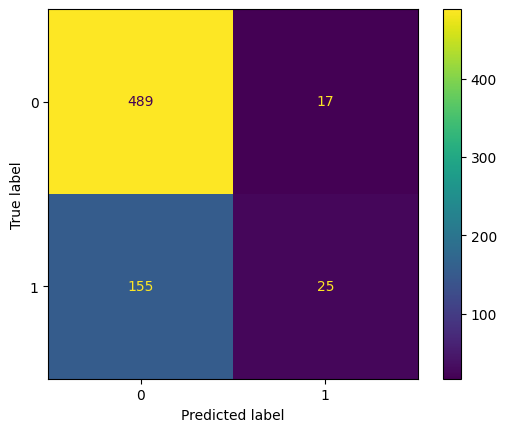

In [86]:
ConfusionMatrixDisplay.from_estimator(clf, X_test_lor, y_test_lor);

In [87]:
y_pred = clf.predict(X_test_lor)

print(classification_report(y_test_lor, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.76      0.97      0.85       506
         Yes       0.60      0.14      0.23       180

    accuracy                           0.75       686
   macro avg       0.68      0.55      0.54       686
weighted avg       0.72      0.75      0.69       686



Der Classification Report zeigt weitere Kennzahlen zur Beurteilung der Güte des Klassifikationsmodells.

Die erste Kennzahl ist Precision. Diese zeigt an mit welcher Genauigkeit die Werte vorhergesagt werden können. Yes bezeichnet dabei die korrekt positiv vorhergesagten Werte, das heißt es wurde vorhergesagt, dass das Profil Fans hat und zu 60% hatte diese Profil dann auch tatsächlich Fans. No gibt an wie viele der negativ vorhergesagten Werte auch tatsächlich negativ waren. Das bedeutet, dass von den Profilen, für die keine Fans vorhergesagt wurden 76% auch tatsächlich keine Fans haben. Das Modell hat für die Profile ohne Fans somit eine höhere Genauigkeit als für die Profile mit Fans.

Der Recall gibt den Anteil der korrekt vorhergesagten positiven Beispiele (Yes) von allen tatsächlich positiven Beispielen an. Etwa 14% der tatsächlichen Profile mit Fans werden korrekt vorhergesagt. Wohingegen bei den Profilen ohne Fans 97% der tatsächlichn Profile ohne Fans korrekt vorhergesagt werden können. Mit dieser Kennzahl wird noch stärker deutlich, dass das Modell für Profile ohne Fans genauere Vorhersagen machen kann. 

Der F1 ist das harmonische Mittel von Precision und Recall. Hier zeigt sich weiterhin, dass Modell für die Profile Fans eine bessere Vorhersage macht. 

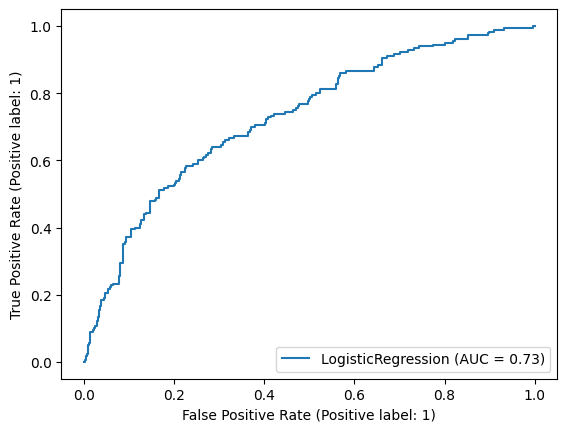

In [88]:
RocCurveDisplay.from_estimator(clf, X_test_lor, y_test_lor) ;

Je stärker die Kurve nach links oben abweicht, desto mehr Profile mit Fans wurden auch als solche vorhergesagt. 
Der AUC ist ein aggregiertes Maß zur Beurteilung der Güte des Modells über alle Tresholds hinweg. 

In [89]:
y_score_lor = clf.predict_proba(X_test_lor)[:, 1]
roc_auc_score(y_test_lor, y_score_lor)

0.7270421607378129

Ein Wert von 0,5 würde bedeuten, dass die Klassfikation zufällig, wohingegen ein Wert von 1 eine perfekte Vorhersage beschreibt. Der Wert dieses Modells liegt bei 0,73. Dieser Wert zeigt somit auch, dass es noch nicht ideal ist.

Durch das Variieren der Schwellenwerte, ist ersichtlich wie sich die vorhergesagten und tatsächlichen Wert verändern.

In [90]:
pred_proba = clf.predict_proba(X_test_lor)

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       506
           1       0.57      0.23      0.33       180

    accuracy                           0.75       686
   macro avg       0.67      0.58      0.59       686
weighted avg       0.72      0.75      0.71       686



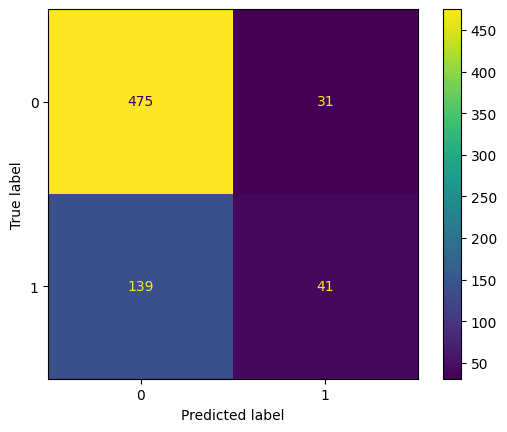

In [91]:
y_test_lor = y_test_lor.astype(int)

df_04 = pd.DataFrame({'y_pred': pred_proba[:,1] > .4})

df_04['y_pred'] = df_04['y_pred'].astype(int)

ConfusionMatrixDisplay.from_predictions(y_test_lor, df_04['y_pred'])
print(classification_report(y_test_lor, df_04['y_pred']))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       506
           1       0.60      0.14      0.23       180

    accuracy                           0.75       686
   macro avg       0.68      0.55      0.54       686
weighted avg       0.72      0.75      0.69       686



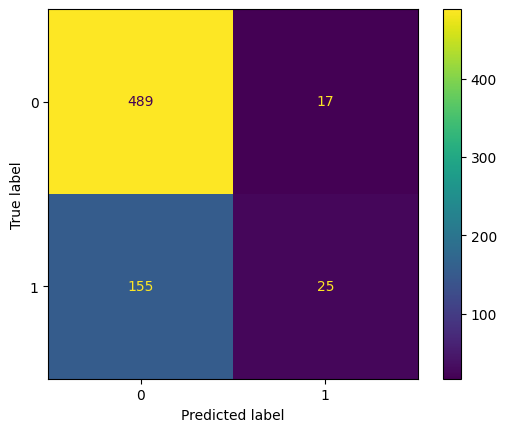

In [92]:
df_05 = pd.DataFrame({'y_pred': pred_proba[:,1] > .5})

df_05['y_pred'] = df_05['y_pred'].astype(int)

ConfusionMatrixDisplay.from_predictions(y_test_lor, df_05['y_pred'])
print(classification_report(y_test_lor, df_05['y_pred']))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       506
           1       0.55      0.03      0.06       180

    accuracy                           0.74       686
   macro avg       0.64      0.51      0.46       686
weighted avg       0.69      0.74      0.64       686



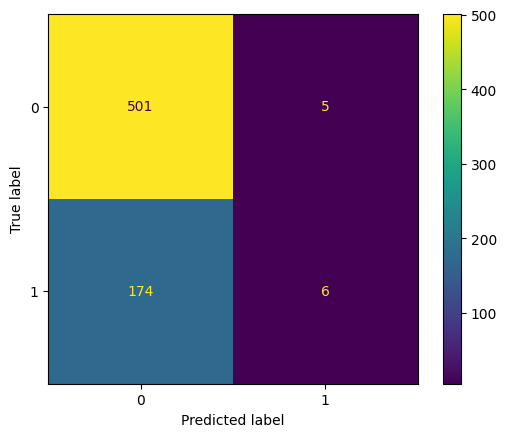

In [93]:
df_07 = pd.DataFrame({'y_pred': pred_proba[:,1] > .7})

df_07['y_pred'] = df_07['y_pred'].astype(int)

ConfusionMatrixDisplay.from_predictions(y_test_lor, df_07['y_pred'])
print(classification_report(y_test_lor, df_07['y_pred']))

Es zeigt sich deutlich, dass ein Erhöhung des Schwellenwertes die Genauigkeit für Profile ohne Fans erhöht. In diesem Fall sind falsch negative Wert kein Fehler, denn die Nutzer von Lovoo nutzen die Plattform um neue Kontakte zu knüpfen und im besten Fall auch einen Partner zu finden. Aus diesem Grund müssen die falsch positiven Werte minimiert werden (predicted label = 1 und true label = 0).
Das zeigt auch dass eine Erhöhung des Tresholds in diesem Modell sinnvoll ist.

#### Reduzierung der Prediktorvariablen

Nichts desto trotz ist das Modell noch nicht ideal.
Aus diesem Grund wird die Modellierung nochmals durchlaufen, jedoch lediglich mit den Preciktorvariablen counts_details und counts_pictures umzusehen wie sich die Werte verändern. 

In [94]:
features_lor2 = ['counts_details', 'counts_pictures']

X_train_lor = X_train_lor[features_lor2] 
X_test_lor = X_test_lor[features_lor2]

##### Select Model

In [95]:
clf2 = LogisticRegression()

##### Training and validation

In [96]:
scores_lor2 = cross_val_score(clf2, X_train_lor, y_train_lor, cv=10, scoring='accuracy')

In [97]:
df_scores_lor2 = pd.DataFrame({"logistic": scores_lor2})

df_scores_lor2.index += 1

df_scores_lor2.style.background_gradient(cmap='Greens')

,logistic
1,0.777372
2,0.759124
3,0.777372
4,0.759124
5,0.777372
6,0.770073
7,0.773723
8,0.777372
9,0.759124
10,0.777372


In [98]:
alt.Chart(df_scores_lor2.reset_index()).mark_line(
     point=alt.OverlayMarkDef()
).encode(
    x=alt.X("index", bin=False, title="Fold", axis=alt.Axis(tickCount=5)),
    y=alt.Y("logistic", aggregate="mean", title="F1")
)

alt.Chart(...)

In [99]:
df_scores_lor2.describe().T

,count,mean,std,min,25%,50%,75%,max
logistic,10.0,0.770803,0.008393,0.759124,0.761861,0.775547,0.777372,0.777372


##### Fit model

In [100]:
clf2 = LogisticRegression(max_iter=1000)
clf2.fit(X_train_lor, y_train_lor)

LogisticRegression(max_iter=1000)

In [101]:
clf2.intercept_

array([-2.42427035])

In [102]:
intercept_lor2 = pd.DataFrame({
    "Name": "Intercept",
    "Coefficient":clf2.intercept_}
    )
intercept_lor2

,Name,Coefficient
0,Intercept,-2.42427


In [103]:
clf2.coef_

array([[1.44638854, 0.06756611]])

In [104]:
coefs_lor2 = pd.DataFrame(clf2.coef_).T
coefs_lor2.rename(columns={0: "Coef"}, inplace=True)

features_lor2 = pd.DataFrame(features_lor2)
features_lor2.rename(columns={0: "Name"}, inplace=True)

table_lor2 = pd.concat([coefs_lor2, features_lor2], axis=1)

round(table_lor2, 6)

,Coef,Name
0,1.446389,counts_details
1,0.067566,counts_pictures


##### Evaluation on test set

In [105]:
y_pred = y_pred.astype(str)
y_test_lor = y_test_lor.astype(str)

In [106]:
y_pred = clf2.predict(X_test_lor)

In [107]:
clf2.score(X_test_lor, y_test_lor)

0.750728862973761

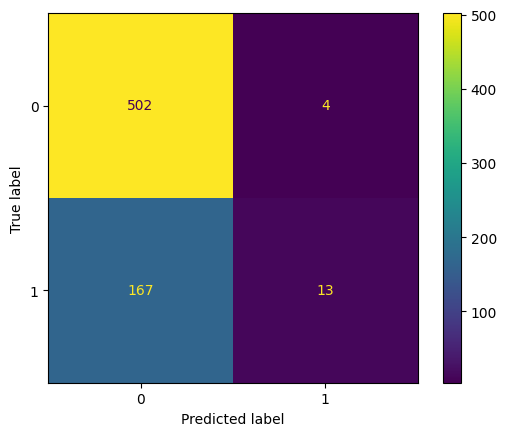

In [108]:
ConfusionMatrixDisplay.from_estimator(clf2, X_test_lor, y_test_lor);

In [109]:
y_pred = clf2.predict(X_test_lor)

print(classification_report(y_test_lor, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.75      0.99      0.85       506
         Yes       0.76      0.07      0.13       180

    accuracy                           0.75       686
   macro avg       0.76      0.53      0.49       686
weighted avg       0.75      0.75      0.66       686



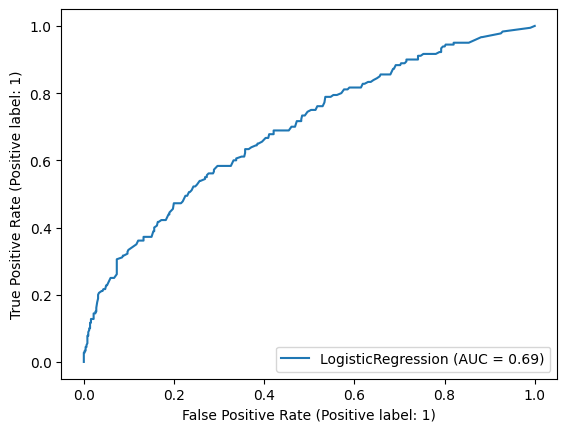

In [110]:
RocCurveDisplay.from_estimator(clf2, X_test_lor, y_test_lor) ;

In [111]:
y_score_lor2 = clf2.predict_proba(X_test_lor)[:, 1]
roc_auc_score(y_test_lor, y_score_lor2)

0.6925065876152833

Die Änderung Predictorvariablen hat keinen großen Einfluss auf die Güte des Modells. Im Gegenteil manche Werte haben sich dadurch sogar noch verschlechtert. Aus diesem Grund wird das Modell mit 4 Predictorvariablen verwendet.

### Save model

In [112]:
pfad_zum_modell = '/Users/nadinebraun/Documents/project/models/20231222_LovooProfile_LogReg.joblib'

dump(clf, pfad_zum_modell)

['/Users/nadinebraun/Documents/project/models/20231222_LovooProfile_LogReg.joblib']

## Conclusions

### Lineare Regression

Für die lineare Regression wurden insgesamt vier Predictorvariablen verwendet (counts_details, counts_pictures, counts_kisses und couts_fans), um vorherzusagen, wie viele Profilbesuche in Lovoo Profil mit bestimmten Merkmalen erhalten wird. Das Modell soll also die Frage beantworten, wie stark sich ein neues hochgeladenes Bild, eine neue Information auf dem Profil, ein neuer Fan oder ein neuer Kiss auf die Anzahl der ProfilVisits auswirkt. 

Die größte Auswirkung auf die Anzahl der User, die das Profil besuchen, hat das Hochladen eines neuen Bildes, hier ist der Slope am größten, gefolgt von einem neuen Detail auf dem Profil. Das lässt sich dadurch erklären, dass bei beiden Variablen eine neue Information über den User hochgeladen wird, auf den andere Nutzer hingewiesen werden und der bei diesen möglicherweise das Interesse weckt. Die anderen Variablen erhöhen sich lediglich durch das Zutun anderer Nutzer auf der Plattform. Auch wenn die anderen beiden Predictorvariablen nur geringe Auswirkungen haben, sind alle Koeffizienten positiv, was bedeutet, dass sich grundsätzlich die Erhöhung jeder Predictorvariable auch positiv auf die Entwicklung der Profilbesuche auswirkt. 

Das Modell zeigt mit einem R^2 Score einen akzeptablen Wert, allerdings sind die durchschnittlichen Abweichungen der vorhergesagten Werte von den tatsächlichen Ergebnissen sehr groß, weshalb es fraglich ist, ob das Modell gerade bei Profil mit wenig Interaktion tatsächlich zielführend ist. Das Problem bleibt auch bei der Reduzierung der Predictorvariablen um die Variablen mit geringer Korrelation bestehen sowie bei Filterung der Ausreißer. 

### Logistische Regression

Zur Vorhersage, ob ein Profil Fans generiert oder nicht wurden vier mögliche Predictorvariablen in der Modellierung berücksichtigt. 
Zum einen counts_profileVisits, counts_details und counts_pictures stehen in diesem Modell in einer positiven Zusammenhang zur untersuchten Responsevariablen fans. Das bedeutet, dass je mehr Besucher, hochgeladene Bilder und befüllte Details ein Profil aufweist, desto wahrscheinlicher ist es, dass dieses profil auch Fans generiert. Die Beziehung zwischen den Fand und dem Grad der befüllten Details ist dabei am stärksten. Das bedeutet, dass die Angabe von Details auf dem Profil besonders wichtig ist um Fans zu generieren. Der Zusammenhang zur vierten Predictorvariablen counts_kisses ist negativ. Dies kann sich unter anderem dadurch erklären lassen, dass wenn ein Nutzer ein Profil besucht sich tendeziell entscheidet ob er diesem Profil folgt und somit zum Fan wird oder vllt. auch einen virtuellen Kiss dalässt um auch so das Interesse zu zeigen. 

Für das Modell sind haben die falsch negativen Werte eine geringere Bedeutung als die falsch positiven Werte, denn Ziel der Nutzer ist es immer andere Menschen auf der Plattform kennenzulernen. Das heißt für die Nutzer ist die Erkenntnis wichtig wie Fans generiert werden können, und nicht wie keine generiert werden können. Aus diesem Grund muss der Wert der falsch positiven Werte so gering wie möglich gehalten werden. Das bedeutet auch, dass der Schwellenwert für das Modell tendenziell hoch angesetzt werden muss. 

Durch die Ungleichverteilung in der Ausprägung der Daten (Verhältnis 1 zu 3) ist die Genauigkeit insbesondere für die korrekt negativ vorhergesagten Werte gut. 